##### TIME SERIES FORECASTING

In [43]:
# Load necessary Libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import itertools
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error
from math import sqrt

In [44]:
# Predefine plotting styles
plt.style.use("fivethirtyeight")
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

### SIMPLE EXPONENTIAL SMOOTHING

In [45]:
# Read the data files
df = pd.read_csv("ES-Data.csv")
df.head()

,Period,Calls Received
0,1,29
1,2,43
2,3,40
3,4,55
4,5,75


In [46]:
df.isnull().sum()

Period            0
Calls Received    0
dtype: int64

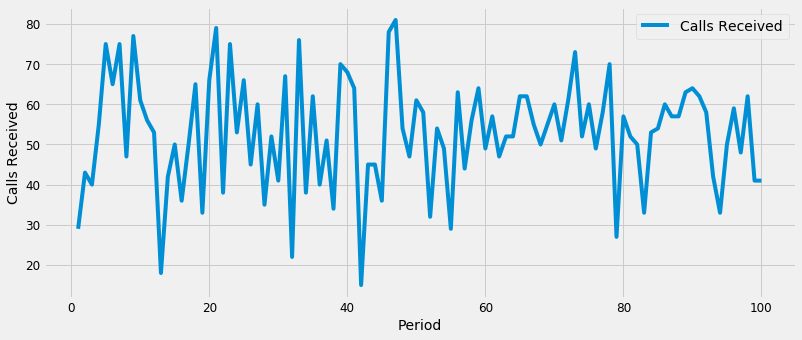

In [47]:
df = df.set_index('Period')
# Plot the time-series
df.plot(figsize=(12,5))
plt.xlabel('Period')
plt.ylabel('Calls Received')
plt.show()
# Inference: No Trend, No Seasonality

### MODEL FITTING

In [48]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_pred_avg = df.copy()

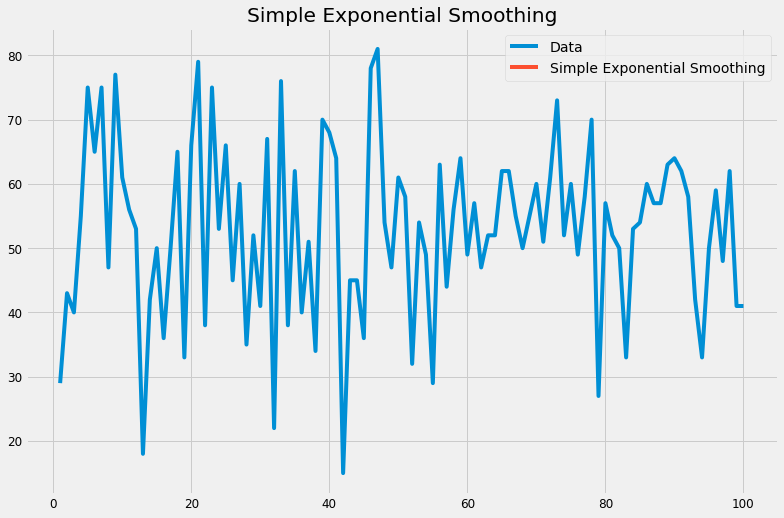

Alpha :  0.0


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [52]:
# SIMPLE EXPONENTIAL SMOOTHING
# m1 = SimpleExpSmoothing(np.asarray(df['Calls Received'])).fit(smoothing_level=0.6, optimized=False)
fitted =  SimpleExpSmoothing(df['Calls Received']).fit(optimized=True)
fitted.forecast(1)
y_pred_avg['SES'] = fitted.forecast(len(df))
plt.figure(figsize=(12,8))
plt.plot(df['Calls Received'],label='Data')
plt.plot(y_pred_avg['SES'], label='Simple Exponential Smoothing')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show()
# ALPHA
Alpha = print('Alpha : ',fitted.model.params['smoothing_level'])
Alpha = fitted.forecast(len(df)).rename(r'$\alpha=%s$'%fitted.model.params['smoothing_level'])
# ERROR
rmse_ses = sqrt(mean_squared_error(df['Calls Received'],y_pred_avg.SES))
print("RMSE using Simple Exponential Smoothing : ",rmse_ses)